# Exercise 1

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

def f1(x):
    return x * np.sin(x) + 2 * x

def f2(x):
    return 10 * np.sin(x) + x**2

def f3(x):
    return np.sign(x) * (x**2 + 300) + 20 * np.sin(x)

random_state = 31
def generate_dataset(func, n_samples=100, tr=20, random_state=random_state):
    X = np.linspace(-tr, tr, n_samples)
    y = func(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.7, random_state=random_state, shuffle=True
    )
    sort_idx = np.argsort(X_test)
    return X_train, np.sort(X_test), y_train, y_test[sort_idx]

functions = [f1, f2, f3]
datasets = {
    f'f{i+1}': {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'function': func
    }
    for i, func in enumerate(functions)
    for X_train, X_test, y_train, y_test in [generate_dataset(func)]
}


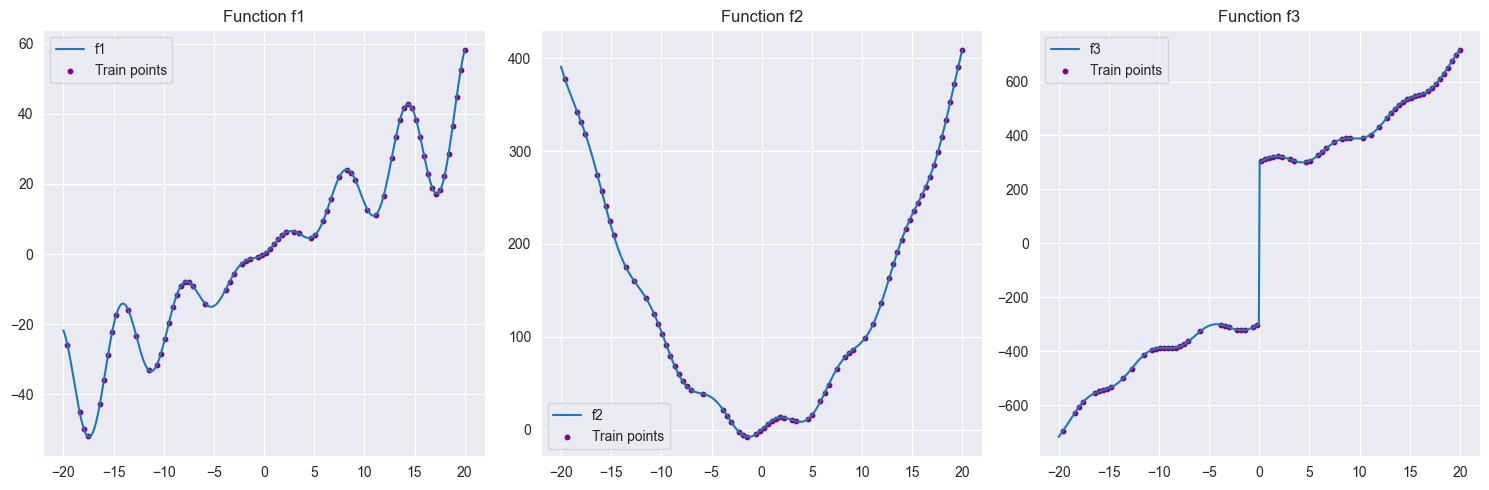

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_datasets(datasets, x_range=(-20, 20), resolution=500):
    fig, axes = plt.subplots(1, len(datasets), figsize=(15, 5))
    X_plot = np.linspace(*x_range, resolution)

    for ax, (name, data) in zip(axes, datasets.items()):
        y_plot = data['function'](X_plot)
        ax.plot(X_plot, y_plot, label=name)
        ax.scatter(data['X_train'], data['y_train'], color='purple', s=10, label='Train points')
        ax.set_title(f'Function {name}')
        ax.legend()

    plt.tight_layout()
    plt.show()

plot_datasets(datasets)

In [4]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


def get_models(random_state):
    return {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'SVR (RBF)': SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1),
        'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=random_state),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=random_state),
    }

def evaluate_models(X_train, X_test, y_train, y_test, random_state):
    models = get_models(random_state)
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f'{name:<20} MSE: {mse:.2f}, R²: {r2:.2f}')

for name, data in datasets.items():
    print(f'\n--- {name} ---')
    X_train = data['X_train'].reshape(-1, 1)
    X_test = data['X_test'].reshape(-1, 1)
    y_train = data['y_train']
    y_test = data['y_test']
    evaluate_models(X_train, X_test, y_train, y_test, random_state=random_state)


--- f1 ---
Linear Regression    MSE: 65.99, R²: 0.84
Ridge Regression     MSE: 65.98, R²: 0.84
SVR (RBF)            MSE: 0.26, R²: 1.00
MLP Regressor        MSE: 67.93, R²: 0.84
Random Forest        MSE: 9.08, R²: 0.98

--- f2 ---
Linear Regression    MSE: 17055.84, R²: -0.30
Ridge Regression     MSE: 17055.42, R²: -0.30
SVR (RBF)            MSE: 170.74, R²: 0.99
MLP Regressor        MSE: 325.60, R²: 0.98


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: in

Random Forest        MSE: 55.82, R²: 1.00

--- f3 ---
Linear Regression    MSE: 11738.71, R²: 0.93
Ridge Regression     MSE: 11739.86, R²: 0.93
SVR (RBF)            MSE: 10675.45, R²: 0.94
MLP Regressor        MSE: 1264.50, R²: 0.99
Random Forest        MSE: 147.90, R²: 1.00


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.fr

In [5]:
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def trig_transform(X, degree=1):
    X = X.flatten()
    features = [func(k * X) for k in range(1, degree + 1) for func in (np.sin, np.cos)]
    return np.column_stack(features)

def evaluate_feature_pipeline(X_train, X_test, y_train, y_test, transformer, degree, label):
    model = make_pipeline(
        StandardScaler(),
        FunctionTransformer(lambda X: transformer(X, degree), validate=False),
        RandomForestRegressor(n_estimators=100, random_state=random_state)
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{label} Degree {degree:<2}: MSE = {mse:.2f}, R² = {r2:.2f}")

def feature_eval(datasets, degrees=[1, 2, 3, 4]):
    for name, data in datasets.items():
        print(f"\n--- {name} with Trigonometric Features ---")
        X_train = data['X_train'].reshape(-1, 1)
        X_test = data['X_test'].reshape(-1, 1)
        y_train, y_test = data['y_train'], data['y_test']

        for d in degrees:
            evaluate_feature_pipeline(X_train, X_test, y_train, y_test, trig_transform, d, label="Trig")

        print(f"\n--- {name} with Polynomial Features ---")
        for d in degrees:
            model = make_pipeline(
                PolynomialFeatures(degree=d),
                RandomForestRegressor(n_estimators=100, random_state=random_state)
            )
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            print(f"Poly Degree {d:<2}: MSE = {mse:.2f}, R² = {r2:.2f}")

feature_eval(datasets)


--- f1 with Trigonometric Features ---
Trig Degree 1 : MSE = 9.38, R² = 0.98
Trig Degree 2 : MSE = 9.13, R² = 0.98
Trig Degree 3 : MSE = 10.93, R² = 0.97
Trig Degree 4 : MSE = 12.48, R² = 0.97

--- f1 with Polynomial Features ---
Poly Degree 1 : MSE = 9.08, R² = 0.98
Poly Degree 2 : MSE = 9.88, R² = 0.98
Poly Degree 3 : MSE = 10.42, R² = 0.98
Poly Degree 4 : MSE = 10.85, R² = 0.97

--- f2 with Trigonometric Features ---
Trig Degree 1 : MSE = 169.13, R² = 0.99
Trig Degree 2 : MSE = 238.12, R² = 0.98
Trig Degree 3 : MSE = 139.44, R² = 0.99
Trig Degree 4 : MSE = 166.85, R² = 0.99

--- f2 with Polynomial Features ---
Poly Degree 1 : MSE = 55.82, R² = 1.00
Poly Degree 2 : MSE = 102.08, R² = 0.99
Poly Degree 3 : MSE = 106.90, R² = 0.99
Poly Degree 4 : MSE = 106.64, R² = 0.99

--- f3 with Trigonometric Features ---
Trig Degree 1 : MSE = 169.23, R² = 1.00
Trig Degree 2 : MSE = 169.13, R² = 1.00
Trig Degree 3 : MSE = 155.36, R² = 1.00
Trig Degree 4 : MSE = 205.27, R² = 1.00

--- f3 with Polyno

# Exercise 2

In [6]:
from sklearn.datasets import make_regression


def create_regression_dataset(n_samples, n_features, n_redundant=0, noise=0.0,
                               random_state=random_state):
    X, y = make_regression(n_samples=n_samples, n_features=n_features,
                           n_informative=n_features - n_redundant,
                           random_state=random_state, shuffle=False)

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
                                                        random_state=random_state)

    return X_train, X_test, y_train, y_test

In [11]:
n_redundant = 5

# --- Easy Regression Dataset ---
X_train, X_test, y_train, y_test = create_regression_dataset(
    n_samples=2000,
    n_features=20,
    noise=0
)
print('--- Regression ---')
eval(X_train, X_test, y_train, y_test)

# --- Hard Regression Dataset (with redundancy and noise) ---
X_train_h, X_test_h, y_train_h, y_test_h = create_regression_dataset(
    n_samples=2000,
    n_features=20,
    n_redundant=n_redundant,
    noise=50.0
)
print('\n--- Regression (Hard) ---')
eval(X_train_h, X_test_h, y_train_h, y_test_h)

# --- Analyze Redundant Feature Coefficients ---
lr = LinearRegression().fit(X_train_h, y_train_h)
redundant_coefs = lr.coef_[-n_redundant:]

print("\nLinear Regression Coefficients (Redundant Features):")
print(redundant_coefs)

--- Regression ---


TypeError: eval expected at most 3 arguments, got 4

# Exercise 3

In [21]:
import pandas as pd

df = pd.read_csv('SummaryofWeather.csv')


df.head(5)
df.describe()
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

/var/folders/sc/fq1vrf6d30nccwgd6zxh80sc0000gn/T/ipykernel_20211/2732016829.py:3: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SummaryofWeather.csv')


STA              int64
Date            object
Precip          object
WindGustSpd    float64
MaxTemp        float64
MinTemp        float64
MeanTemp       float64
Snowfall        object
PoorWeather     object
YR               int64
MO               int64
DA               int64
PRCP            object
DR             float64
SPD            float64
MAX            float64
MIN            float64
MEA            float64
SNF             object
SND            float64
FT             float64
FB             float64
FTI            float64
ITH            float64
PGT            float64
TSHDSBRSGF      object
SD3            float64
RHX            float64
RHN            float64
RVG            float64
WTE            float64
dtype: object

Missing 'MeanTemp' values: 0


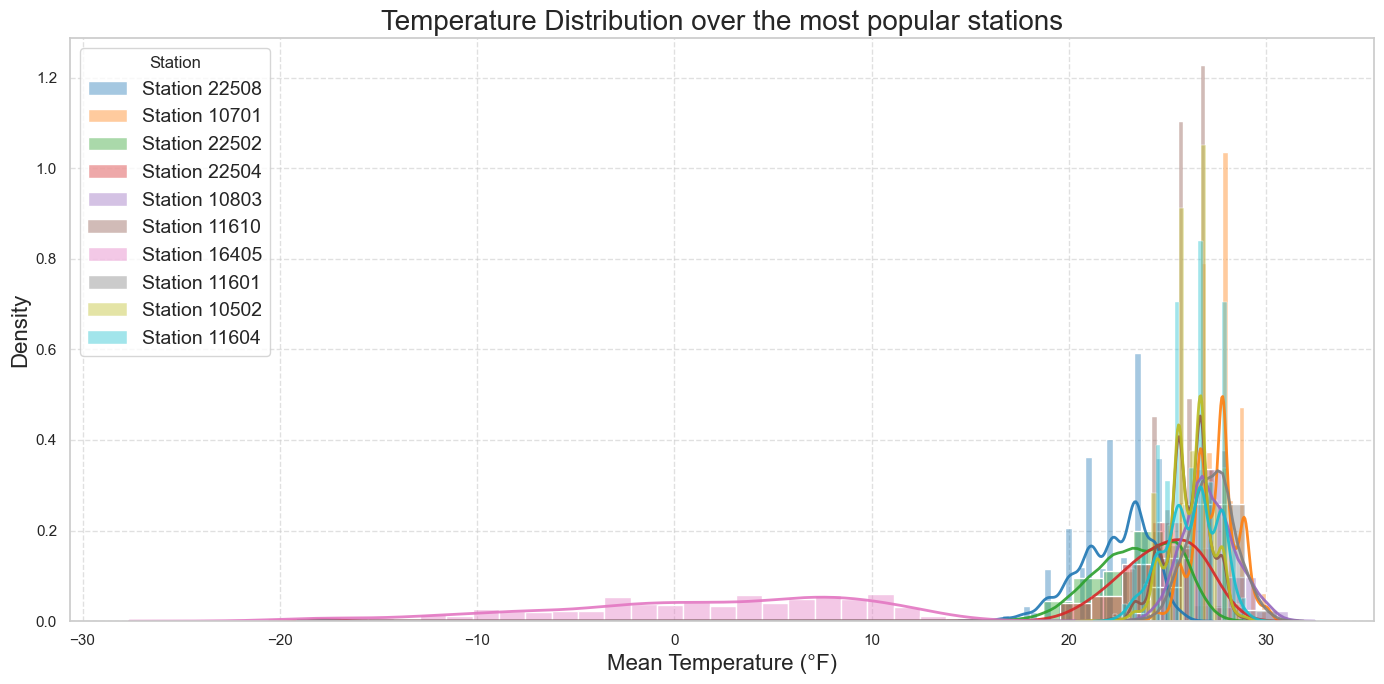

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

missing_count = df['MeanTemp'].isna().sum()
print(f"Missing 'MeanTemp' values: {missing_count}")

station_counts = df.groupby('STA')['MeanTemp'].count()
top_10_stations = station_counts.sort_values(ascending=False).head(10).index

plt.figure(figsize=(14, 7))
palette = sns.color_palette('tab10', n_colors=10)

for i, station in enumerate(top_10_stations):
    temps = df.loc[df['STA'] == station, 'MeanTemp'].dropna()
    sns.histplot(
        temps, bins=30, stat='density', kde=False,
        color=palette[i], alpha=0.4, label=f'Station {station}'
    )
    sns.kdeplot(
        temps, color=palette[i], linewidth=2, alpha=0.9
    )

plt.title('Temperature Distribution over the most popular stations', fontsize=20)
plt.xlabel('Mean Temperature (°F)', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend(title='Station', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

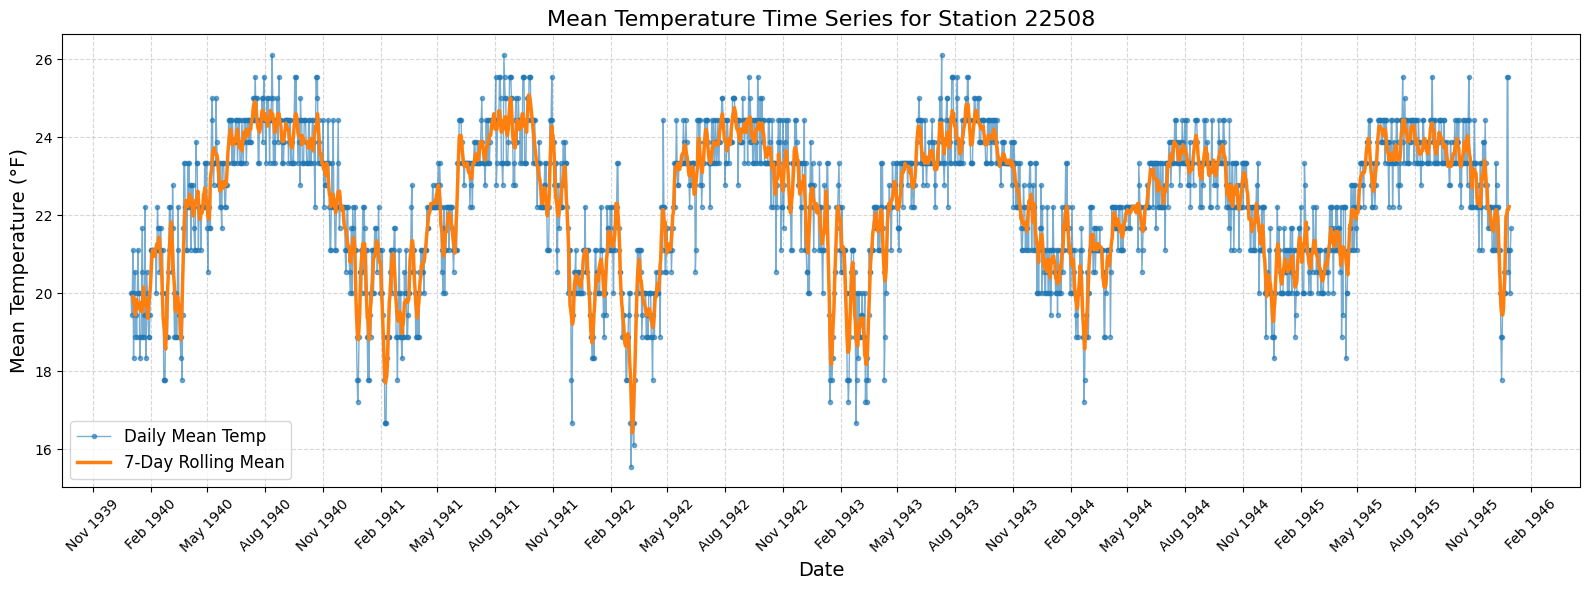

In [24]:
import matplotlib.dates as mdates

station_data = df[df['STA'] == 22508].copy()
station_data['Date'] = pd.to_datetime(station_data['Date'])
station_data.set_index('Date', inplace=True)
station_data = station_data[['MeanTemp']].dropna()

# Calculate 7-day rolling average
station_data['RollingMean'] = station_data['MeanTemp'].rolling(window=7, center=True).mean()

plt.figure(figsize=(16, 6))

# Plot original data with markers
plt.plot(station_data.index, station_data['MeanTemp'],
         marker='o', markersize=3, linestyle='-', linewidth=1,
         alpha=0.6, color='tab:blue', label='Daily Mean Temp')

# Plot rolling average with thicker line
plt.plot(station_data.index, station_data['RollingMean'],
         color='tab:orange', linewidth=2.5, label='7-Day Rolling Mean')

plt.title('Mean Temperature Time Series for Station 22508', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Mean Temperature (°F)', fontsize=14)

plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.legend(fontsize=12)

# Improve date formatting on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [27]:
import numpy as np

def create_rolling_windows(data, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 7
X, y = create_rolling_windows(station_data['MeanTemp'].values, window_size)

In [28]:
# Create boolean masks for train/test split based on year
train_mask = station_data.index.year < 1945
test_mask = station_data.index.year == 1945

# Adjust masks length to match rolling window outputs
valid_length = len(station_data) - window_size
train_mask = train_mask[:valid_length]
test_mask = test_mask[:valid_length]

# Get indices for train and test samples
train_indices = np.where(train_mask)[0]
test_indices = np.where(test_mask)[0]

# Select corresponding rolling windows and targets
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (1827, 7), Test shape: (358, 7)


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Linear Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=random_state),
    'Neural Network': Pipeline([
        ('scaler', StandardScaler()),
        ('model', MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=random_state))
    ])
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results[name] = {'r2': r2, 'mse': mse}
    print(f"{name}: R2 = {r2:.4f}, MSE = {mse:.4f}")

best_model_name = max(results, key=lambda x: results[x]['r2'])
print(f"\nBest model: {best_model_name}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Version

Linear Regression: R2 = 0.6797, MSE = 0.7436
Random Forest: R2 = 0.6369, MSE = 0.8430
Neural Network: R2 = 0.6468, MSE = 0.8199

Best model: Linear Regression


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [9]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

tscv = TimeSeriesSplit(n_splits=3)
rf = RandomForestRegressor(random_state=random_state)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print(f"Tuned RF R2: {r2_score(y_test, y_pred_rf):.4f}")
print(f"Tuned RF MSE: {mean_squared_error(y_test, y_pred_rf):.4f}")

Tuned RF R2: 0.7195
Tuned RF MSE: 17238.9531
